# Dike Model Analysis

In [1]:
# import libraries
from ema_workbench import (save_results, load_results)
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## Scenario Selection for Directed Search

In [2]:
# retrieve the experiments and outcomes used for the PRIM analysis
# configuration: 5000 scenarios under 1 reference policy in which all policy levers are set to zero
experiments, outcomes = load_results('./results/prim_problem3.tar.gz')

In [3]:
# show outcomes for problem framing 3
outcomes.keys()

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [4]:
# define the regressors used to retrieve scenarios
X = experiments.iloc[:, 0:(len(experiments.columns)-3)]

In [5]:
# convert outcomes array to dataframe
outcomes_df = pd.DataFrame(outcomes)

In [6]:
# only select outcomes under study, which are the expected number of deaths
ooi = outcomes_df[['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths']]

In [7]:
# retrieve the data points of the expected number of deaths in dike rings 1 - 3 which are higher than 0.0 deaths
threshold_a1 = np.percentile(outcomes_df['A.1_Expected Number of Deaths'], 21)
threshold_a2 = np.percentile(outcomes_df['A.2_Expected Number of Deaths'], 30)
threshold_a3 = np.percentile(outcomes_df['A.3_Expected Number of Deaths'], 41)

In [8]:
# show the threshold for each dike ring
print("The threshold for dike ring 1:", threshold_a1)
print("The threshold for dike ring 2:", threshold_a2)
print("The threshold for dike ring 3:", threshold_a3)

The threshold for dike ring 1: 0.0103606601192425
The threshold for dike ring 2: 0.0032117105988548
The threshold for dike ring 3: 0.00986346666450913


In [200]:
# assess rows in ooi for which expected number of deaths is larger than 0.0 for all dike rings
# and allocate a binary value to a new column which either takes 0 or 1
ooi['ooi'] = ((ooi['A.1_Expected Number of Deaths'] >= threshold_a1) & 
              (ooi['A.2_Expected Number of Deaths'] >= threshold_a2) & 
              (ooi['A.3_Expected Number of Deaths'] >= threshold_a3)).astype(int)

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_6003/140937224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ooi['ooi'] = ((ooi['A.1_Expected Number of Deaths'] >= threshold_a1) &


In [201]:
# show the number of data points which take 0 and 1 as values
ooi.ooi.value_counts()

ooi
0    3462
1    1538
Name: count, dtype: int64

In [202]:
# select the dependent variable, and convert to a numpy array
y = ooi['ooi'].to_numpy()

In [204]:
# initiate the algorithm with a threshold of 0.8 and a peel alpha of 0.1
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [205]:
# search for boxes
box = sd_alg.find_box()

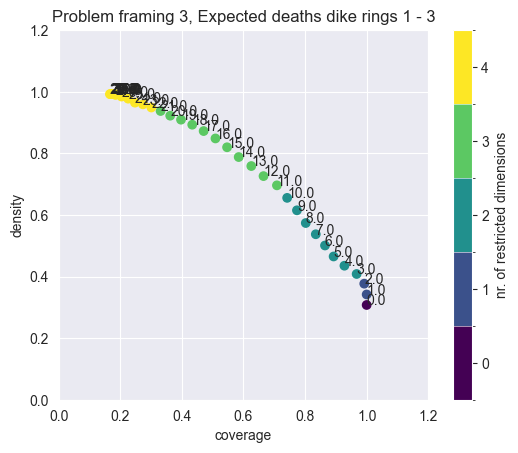

In [206]:
# show the trade-off between coverage and density
box.show_tradeoff(annotated=True)
plt.title("Problem framing 3, Expected deaths dike rings 1 - 3")
plt.show()

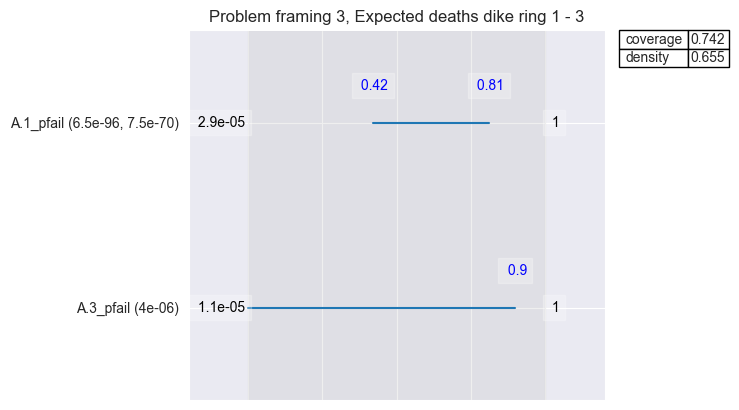

In [207]:
# determine point to study
# here, point 10 is chosen since it gives the least number of restrictions, 
# while optimizing the combination of coverage and density
point_to_study = 10
box.inspect(point_to_study, style='graph')
plt.title("Problem framing 3, Expected deaths dike ring 1 - 3")
plt.show()

In [208]:
# extract indices which satisfy the identified box
indices = box.yi
# filter experiments based on indices
exp_filtered = experiments.iloc[indices]
# show filtered experiments
exp_filtered

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
2,105,158.533238,10.0,0.537359,315.145762,1.0,0.343249,290.983221,1.0,0.213538,...,0,0,0,0,0,0,0,2,Policy 0,dikesnet
33,122,189.698330,1.0,0.682612,299.782340,1.0,0.708662,176.717249,10.0,0.335554,...,0,0,0,0,0,0,0,33,Policy 0,dikesnet
56,8,124.406106,10.0,0.564305,188.281947,1.5,0.363772,258.363480,10.0,0.238341,...,0,0,0,0,0,0,0,56,Policy 0,dikesnet
70,7,92.494983,10.0,0.695807,141.911870,10.0,0.761783,113.549535,10.0,0.034505,...,0,0,0,0,0,0,0,70,Policy 0,dikesnet
117,93,40.537874,1.5,0.712848,49.618879,1.5,0.547637,205.325470,1.0,0.425226,...,0,0,0,0,0,0,0,117,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,11,122.316720,1.0,0.572786,114.275576,1.5,0.569826,139.651981,1.0,0.072716,...,0,0,0,0,0,0,0,4899,Policy 0,dikesnet
4924,101,281.165784,1.0,0.693964,42.142980,10.0,0.604134,141.749554,10.0,0.238004,...,0,0,0,0,0,0,0,4924,Policy 0,dikesnet
4934,33,43.823637,1.0,0.643488,303.542361,1.5,0.779226,299.602868,10.0,0.028695,...,0,0,0,0,0,0,0,4934,Policy 0,dikesnet
4950,114,80.309914,1.0,0.542835,179.860698,1.5,0.340880,92.264076,1.0,0.358026,...,0,0,0,0,0,0,0,4950,Policy 0,dikesnet


In [209]:
# save results
save_results((exp_filtered, outcomes), './results/scenario_selection.tar.gz')